In [55]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, norm, skew
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# Aquisição dos dados

In [5]:
test_set = pd.read_csv(r'./eel891-202101-trabalho-2/conjunto_de_teste.csv')
test_set

,Id,tipo,bairro,tipo_vendedor,quartos,suites,vagas,area_util,area_extra,diferenciais,churrasqueira,estacionamento,piscina,playground,quadra,s_festas,s_jogos,s_ginastica,sauna,vista_mar
0,0,Apartamento,Pina,Imobiliaria,4,4,3,182,0,copa e playground,0,0,0,1,0,0,0,0,0,0
1,1,Apartamento,Tamarineira,Imobiliaria,2,0,1,85,0,nenhum,0,0,0,0,0,0,0,0,0,0
2,2,Apartamento,Boa Viagem,Imobiliaria,3,1,2,115,20,piscina e churrasqueira,1,0,1,0,0,0,0,0,0,0
3,3,Apartamento,Iputinga,Imobiliaria,3,0,1,92,0,nenhum,0,0,0,0,0,0,0,0,0,0
4,4,Apartamento,Engenho do Meio,Imobiliaria,3,1,1,65,0,piscina e copa,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,Apartamento,Poco da Panela,Imobiliaria,2,1,2,100,0,nenhum,0,0,0,0,0,0,0,0,0,0
1996,1996,Apartamento,Madalena,Imobiliaria,3,1,1,90,0,nenhum,0,0,0,0,0,0,0,0,0,0
1997,1997,Apartamento,Boa Viagem,Imobiliaria,3,1,1,73,0,piscina e salao de festas,0,0,1,0,0,1,0,0,0,0
1998,1998,Apartamento,Torre,Imobiliaria,4,3,2,112,2810,piscina e frente para o mar,0,0,1,0,0,0,0,0,0,1


In [8]:
train_set = pd.read_csv(r'./eel891-202101-trabalho-2/conjunto_de_treinamento.csv')
train_set

,Id,tipo,bairro,tipo_vendedor,quartos,suites,vagas,area_util,area_extra,diferenciais,...,estacionamento,piscina,playground,quadra,s_festas,s_jogos,s_ginastica,sauna,vista_mar,preco
0,2000,Casa,Imbiribeira,Imobiliaria,3,3,5,223,167,piscina e copa,...,0,1,0,0,0,0,0,0,0,1000000.0
1,2001,Apartamento,Casa Amarela,Imobiliaria,4,4,2,157,0,piscina e churrasqueira,...,0,1,0,0,0,0,0,0,0,680000.0
2,2002,Apartamento,Encruzilhada,Imobiliaria,3,1,0,53,0,nenhum,...,0,0,0,0,0,0,0,0,0,450000.0
3,2003,Apartamento,Boa Viagem,Imobiliaria,4,3,2,149,0,piscina e churrasqueira,...,0,1,0,0,0,0,0,0,0,1080000.0
4,2004,Apartamento,Rosarinho,Imobiliaria,2,1,1,54,0,piscina e churrasqueira,...,0,1,0,0,0,0,0,0,0,350000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4678,6678,Apartamento,Boa Viagem,Imobiliaria,4,4,3,170,0,piscina e churrasqueira,...,0,1,0,0,0,0,0,0,0,1200000.0
4679,6679,Apartamento,Setubal,Imobiliaria,2,0,1,82,0,churrasqueira,...,0,0,0,0,0,0,0,0,0,258000.0
4680,6680,Apartamento,Torre,Imobiliaria,3,1,1,75,0,nenhum,...,0,0,0,0,0,0,0,0,0,252000.0
4681,6681,Apartamento,Casa Amarela,Imobiliaria,3,2,3,136,0,piscina e copa,...,0,1,0,0,0,0,0,0,0,780000.0


# Análise dos Dados 
## verificando a presença de valores nulos.

In [36]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [39]:
train_set_out = remove_outlier(train_set, "preco")
train_set_out

,Id,tipo,bairro,tipo_vendedor,quartos,suites,vagas,area_util,area_extra,diferenciais,...,estacionamento,piscina,playground,quadra,s_festas,s_jogos,s_ginastica,sauna,vista_mar,preco
0,2000,Casa,Imbiribeira,Imobiliaria,3,3,5,223,167,piscina e copa,...,0,1,0,0,0,0,0,0,0,1000000.0
1,2001,Apartamento,Casa Amarela,Imobiliaria,4,4,2,157,0,piscina e churrasqueira,...,0,1,0,0,0,0,0,0,0,680000.0
2,2002,Apartamento,Encruzilhada,Imobiliaria,3,1,0,53,0,nenhum,...,0,0,0,0,0,0,0,0,0,450000.0
3,2003,Apartamento,Boa Viagem,Imobiliaria,4,3,2,149,0,piscina e churrasqueira,...,0,1,0,0,0,0,0,0,0,1080000.0
4,2004,Apartamento,Rosarinho,Imobiliaria,2,1,1,54,0,piscina e churrasqueira,...,0,1,0,0,0,0,0,0,0,350000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4678,6678,Apartamento,Boa Viagem,Imobiliaria,4,4,3,170,0,piscina e churrasqueira,...,0,1,0,0,0,0,0,0,0,1200000.0
4679,6679,Apartamento,Setubal,Imobiliaria,2,0,1,82,0,churrasqueira,...,0,0,0,0,0,0,0,0,0,258000.0
4680,6680,Apartamento,Torre,Imobiliaria,3,1,1,75,0,nenhum,...,0,0,0,0,0,0,0,0,0,252000.0
4681,6681,Apartamento,Casa Amarela,Imobiliaria,3,2,3,136,0,piscina e copa,...,0,1,0,0,0,0,0,0,0,780000.0


In [57]:
train_set_out.columns

Index(['Id', 'tipo', 'bairro', 'tipo_vendedor', 'quartos', 'suites', 'vagas',
       'area_util', 'area_extra', 'diferenciais', 'churrasqueira',
       'estacionamento', 'piscina', 'playground', 'quadra', 's_festas',
       's_jogos', 's_ginastica', 'sauna', 'vista_mar', 'preco'],
      dtype='object')

<AxesSubplot:ylabel='preco'>

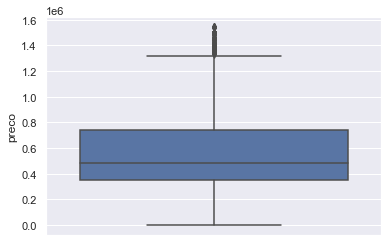

In [40]:
sns.boxplot(y=train_set_out["preco"])

C:\Users\phelipe.francesco\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='preco', ylabel='Density'>

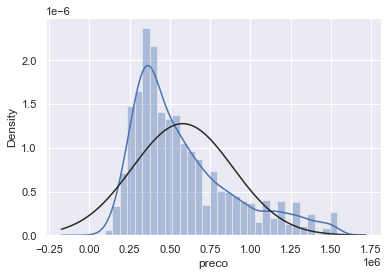

In [56]:
sns.distplot(train_set_out["preco"], fit=norm)

In [21]:
colnames = ['quartos', 'suites', 'vagas', 'area_util', 'area_extra']
cols = ['preco', 'suites', 'vagas', 'area_util', 'quartos', 'churrasqueira', 'vista_mar', 's_festas', 'piscina']
sns.pairplot(df_train[cols], size = 2)

Id: (-0.009642760756471826, 0.509435515241291)


TypeError: unsupported operand type(s) for +: 'float' and 'str'

In [25]:
train_set[col].dtypes 

numpy.dtype[object_]

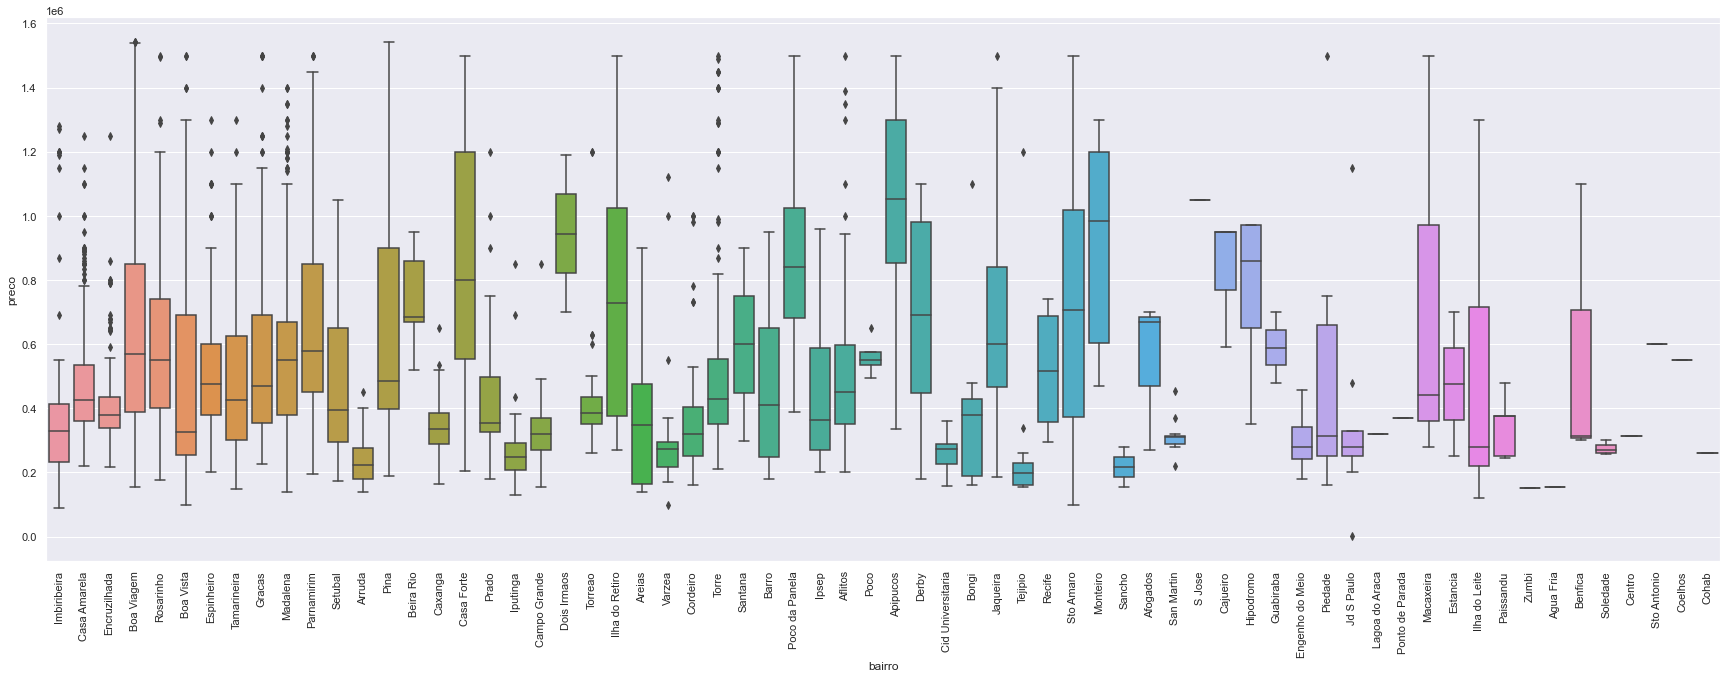

In [53]:
fig = plt.figure(figsize=(30,10))
sns.boxplot(data=train_set_out, x="bairro", y="preco")
plt.xticks(rotation=90)
plt.show()